In [1]:
#install required libraries
import pandas as pd
import numpy as np
#data visualization packages
import matplotlib.pyplot as plt
#keras packages
import keras
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dropout
#model evaluation packages
from sklearn.metrics import f1_score, roc_auc_score, log_loss
from sklearn.model_selection import cross_val_score, cross_validate

Using TensorFlow backend.


In [2]:
#read mnist fashion dataset
mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

4423680/4422102 [==============================] - 1s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [3]:
#reshape data from 3-D to 2-D array
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
#feature scaling
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
#fit and transform training dataset
X_train = minmax.fit_transform(X_train)
#transform testing dataset
X_test = minmax.transform(X_test)
print('Number of unique classes: ', len(np.unique(y_train)))
print('Classes: ', np.unique(y_train))

Number of unique classes:  10
Classes:  [0 1 2 3 4 5 6 7 8 9]


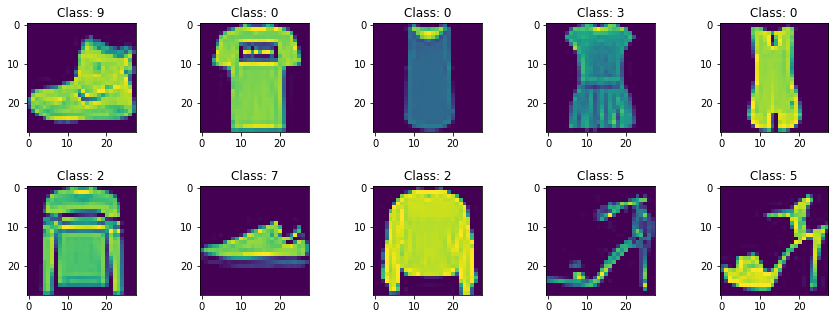

In [4]:
fig, axes = plt.subplots(nrows=2, ncols=5,figsize=(15,5))          
ax = axes.ravel()
for i in range(10):
    ax[i].imshow(X_train[i].reshape(28,28))
    ax[i].title.set_text('Class: ' + str(y_train[i]))              
plt.subplots_adjust(hspace=0.5)                                    
plt.show()

In [5]:
#initializing CNN model
classifier_e25 = Sequential()
#add 1st hidden layer
classifier_e25.add(Dense(input_dim = X_train.shape[1], units = 256, kernel_initializer='uniform', activation='relu'))
#add output layer
classifier_e25.add(Dense(units = 10, kernel_initializer='uniform', activation='softmax'))
#compile the neural network
classifier_e25.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#model summary
classifier_e25.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [6]:
#fit training dataset into the model
classifier_e25_fit = classifier_e25.fit(X_train, y_train, epochs=25, verbose=1)

Epoch 1/25
60000/60000 [==============================] - 8s 137us/step - loss: 0.4946 - accuracy: 0.8241
Epoch 2/25
60000/60000 [==============================] - 8s 135us/step - loss: 0.3653 - accuracy: 0.8658
Epoch 3/25
60000/60000 [==============================] - 8s 133us/step - loss: 0.3239 - accuracy: 0.8813
Epoch 4/25
60000/60000 [==============================] - 8s 130us/step - loss: 0.3010 - accuracy: 0.8885
Epoch 5/25
60000/60000 [==============================] - 8s 127us/step - loss: 0.2832 - accuracy: 0.8942
Epoch 6/25
60000/60000 [==============================] - 8s 129us/step - loss: 0.2690 - accuracy: 0.9000
Epoch 7/25
60000/60000 [==============================] - 8s 127us/step - loss: 0.2550 - accuracy: 0.9044
Epoch 8/25
60000/60000 [==============================] - 8s 125us/step - loss: 0.2441 - accuracy: 0.9099
Epoch 9/25
60000/60000 [==============================] - 7s 125us/step - loss: 0.2347 - accuracy: 0.9117
Epoch 10/25
60000/60000 [=====================

In [7]:
#evaluate the model for testing dataset
test_loss_e25 = classifier_e25.evaluate(X_test, y_test, verbose=0)
#calculate evaluation parameters
f1_e25 = f1_score(y_test, classifier_e25.predict_classes(X_test), average='micro')
roc_e25 = roc_auc_score(y_test, classifier_e25.predict_proba(X_test), multi_class='ovo')
#create evaluation dataframe
stats_e25 = pd.DataFrame({'Test accuracy' :  round(test_loss_e25[1]*100,3),
                      'F1 score'      : round(f1_e25,3),
                      'ROC AUC score' : round(roc_e25,3),
                      'Total Loss'    : round(test_loss_e25[0],3)}, index=[0])
#print evaluation dataframe
display(stats_e25)

,Test accuracy,F1 score,ROC AUC score,Total Loss
0,89.28,0.893,0.991,0.39
